# Finance Project -- implementation of the Capital Asset Prizing Model

### Import the necessary packages

In [33]:
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt

In [34]:
path = os.getcwd()
print(path)

C:\Users\MWCL702


### Import stock data

In [35]:
goog = pd.read_csv('GOOG.csv', header = 0, index_col = False, usecols = ['Date','Adj Close'])
ko = pd.read_csv('KO_withdiv.csv', header = 0, index_col = False, usecols = ['Date','Adj Close'])
sp500 = pd.read_csv('S&P500.csv',header = 0, index_col = False, usecols = ['Date','Adj Close'])
sp500.head()

,Date,Adj Close
0,2014-01-01,1782.589966
1,2014-02-01,1859.449951
2,2014-03-01,1872.339966
3,2014-04-01,1883.949951
4,2014-05-01,1923.569946


### Rename the columns

In [36]:
ko.rename(columns={'Adj Close':'p_t'}, inplace = True)
goog.rename(columns={'Adj Close':'p_t'}, inplace = True) #rename adj closing price to p_t
sp500.rename(columns={'Adj Close':'p_t'}, inplace = True)
sp500.head()

,Date,p_t
0,2014-01-01,1782.589966
1,2014-02-01,1859.449951
2,2014-03-01,1872.339966
3,2014-04-01,1883.949951
4,2014-05-01,1923.569946


### Dataframe organization

In [37]:
goog_price = goog.loc[0:59]
goog_price = goog_price.rename(columns = {'p_t':'p_t-1'})
emptyrow = pd.DataFrame(data = {'Date':[0],'p_t-1':[0]}) #create 0 row
goog_price = emptyrow.append(goog_price)
goog_price = goog_price.drop('Date', axis = 1)
goog_price.index = range(0,61)
goog = pd.concat([goog, goog_price], axis = 1)
goog['return'] = round((goog['p_t'] - goog['p_t-1'])/goog['p_t-1'], 4 )
goog = goog.drop(0, axis = 0)

In [38]:
ko_price = ko.loc[0:59]
ko_price = ko_price.rename(columns = {'p_t':'p_t-1'})
emptyrow = pd.DataFrame(data = {'Date':[0],'p_t-1':[0]}) #create 0 row
ko_price = emptyrow.append(ko_price)
ko_price = ko_price.drop(['Date'],axis = 1)
ko_price.index = range(0,61)
ko = pd.concat([ko, ko_price], axis = 1)
ko['return'] = round((ko['p_t'] - ko['p_t-1'])/ko['p_t-1'], 4)
ko = ko.drop(0, axis = 0)

In [39]:
sp500_price = sp500.loc[0:59]
sp500_price = sp500_price.rename(columns = {'p_t':'p_t-1'})
emptyrow = pd.DataFrame(data = {'Date':[0],'p_t-1':[0]}) #create 0 row
sp500_price = emptyrow.append(sp500_price)
sp500_price = sp500_price.drop('Date', axis = 1)
sp500_price.index = range(0,61)
sp500 = pd.concat([sp500, sp500_price], axis = 1)
sp500['return'] = round((sp500['p_t'] - sp500['p_t-1'])/sp500['p_t-1'], 4 )
sp500 = sp500.drop(0, axis = 0)
sp500.head()

,Date,p_t,p_t-1,return
1,2014-02-01,1859.449951,1782.589966,0.0431
2,2014-03-01,1872.339966,1859.449951,0.0069
3,2014-04-01,1883.949951,1872.339966,0.0062
4,2014-05-01,1923.569946,1883.949951,0.0210
5,2014-06-01,1960.229980,1923.569946,0.0191


In [40]:
print(os.getcwd())

C:\Users\MWCL702


### Export organized dataframes

In [41]:
#goog.to_csv('goog_return.csv',index = True, header = True)

#ko.to_csv('ko_return.csv',index = True, header = True)

#sp500.to_csv('sp_return.csv',index = True, header = True)

### Calculation of mean, standard deviation for the return 

In [42]:
mean_std_goog = goog['return'].agg(['mean','std'])
mean_std_ko = ko['return'].agg(['mean','std'])

### Print out the correlation coefficient for the return of the two stocks

In [43]:
print('correlation is ',round(goog['return'].corr(ko['return']), 4),'\ngoogl \n', mean_std_goog,'\nko \n',mean_std_ko ,sep = "")

correlation is 0.3555
googl 
mean    0.012340
std     0.058155
Name: return, dtype: float64
ko 
mean    0.007427
std     0.037702
Name: return, dtype: float64


In [44]:
portfolio_ratio = np.arange(0,1.05,0.05)
ko_mean = ko['return'].mean()
ko_std = ko['return'].std()
goog_mean = goog['return'].mean()
goog_std = goog['return'].std()
sp500_mean = sp500['return'].mean()
sp500_std = sp500['return'].std()
corr_ko_goog = goog['return'].corr(ko['return'])

### Create a dataframe for the stock portfolio

In [58]:
portfolio = pd.DataFrame(data= {'ko_ratio':portfolio_ratio})
portfolio['goog_ratio'] = 1 - portfolio['ko_ratio']
portfolio['portfolio_mean'] = round(ko_mean * portfolio['ko_ratio'] + goog_mean * portfolio['goog_ratio'], 4)
portfolio['portfolio_var'] = (ko_std  * portfolio['ko_ratio'] )**2 + (goog_std * portfolio['goog_ratio'] )**2 + 2 * portfolio['ko_ratio'] * portfolio['goog_ratio'] * corr_ko_goog * goog_std * ko_std
portfolio['portfolio_std'] = round((portfolio['portfolio_var']) ** 0.5, 4)
portfolio.head()

,ko_ratio,goog_ratio,portfolio_mean,portfolio_var,portfolio_std
0,0.00,1.00,0.0123,0.003382,0.0582
1,0.05,0.95,0.0121,0.003130,0.0559
2,0.10,0.90,0.0118,0.002894,0.0538
3,0.15,0.85,0.0116,0.002674,0.0517
4,0.20,0.80,0.0114,0.002471,0.0497


In [46]:
#portfolio.to_csv('portfolio.csv',index = True, header = True)

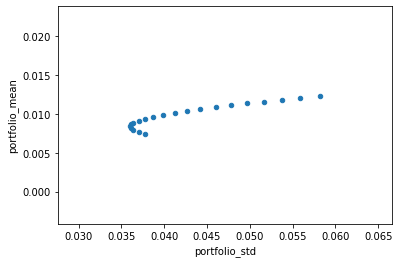

In [47]:
plot_port = portfolio.plot.scatter(x = 'portfolio_std', y = 'portfolio_mean')
plot_port
#plt.savefig('portfolio.png')

In [48]:
sp500.loc[60,'return']

0.0787

In [61]:
sp500_ko_goog = pd.DataFrame(data = {'sp_500_r':sp500['return'],'ko_r':ko['return'],'goog_r':goog['return'] })

In [51]:
cov_sp500_ko = sp500_ko_goog['sp_500_r'].cov(sp500_ko_goog['ko_r'])
cov_sp500_goog = sp500_ko_goog['sp_500_r'].cov(sp500_ko_goog['goog_r'])

In [65]:
%%latex
Calculation of $\beta$  

<IPython.core.display.Latex object>

In [52]:
beta_ko = round(cov_sp500_ko/(sp500_std)**2, 4) #round off to 4th decimal
beta_goog = round(cov_sp500_goog/(sp500_std)**2, 4)
print('beta of ko   is ',beta_ko,'\n','beta of goog is ',beta_goog, sep = '')

beta of ko   is 0.5351
beta of goog is 1.0369


### Function for CAPM

In [53]:
def capm(beta,mkt_r,r):
    return(r + beta * (mkt_r - r))

In [54]:
sp500_mean

0.00749

In [55]:
ko_2018_capm = round(capm(beta_ko, sp500_mean, 0.001),4)
goog_2018_capm = round(capm(beta_goog, sp500_mean, 0.001),4)

### Result

In [63]:
print('expected return of ko at Dec.2018 is ',ko_2018_capm,"\nthe true return is ",ko.loc[60,'return'])

expected return of ko at Dec.2018 is  0.0045 
the true return is  0.0165


In [62]:
print('expected return of goog at Dec.2018 is ',goog_2018_capm,"\nthe true return is ",goog.loc[60,'return'])

expected return of goog at Dec.2018 is  0.0077 
the true return is  0.078
